In [1]:
import numpy as np
import pandas as pd
import os 
import time
import deepdish.io as dd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler

from svi import SVI
import models as m
import datasets as d

# Load and Prepare Data

In [2]:
data = dd.load("sequenced_data_for_VAE_lenght-160_stride-10.h5")

In [3]:
X,y = data["X"], data["y"]

In [4]:
X

tensor([[0.1872, 0.1890, 0.1805,  ..., 0.1791, 0.1756, 0.1754],
        [0.1980, 0.1989, 0.1974,  ..., 0.1850, 0.1930, 0.1860],
        [0.2103, 0.2107, 0.2080,  ..., 0.1960, 0.2044, 0.2041],
        ...,
        [0.4694, 0.4644, 0.4707,  ..., 0.4877, 0.4774, 0.4771],
        [0.5260, 0.5163, 0.5141,  ..., 0.4935, 0.5005, 0.5110],
        [0.5704, 0.5643, 0.5629,  ..., 0.5024, 0.4991, 0.5269]],
       dtype=torch.float64)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2, random_state=666)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
train = d.H_alphaSequences(X_train, y_train)
test = d.H_alphaSequences(X_test, y_test)

In [8]:
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size=100, shuffle=True)

# Model setup

In [9]:
torch.cuda.is_available()

True

In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
#m.DeepDenseVAE_mark_IV(original_dim=160, latent_dim=15, encoder_dims=[300, 200, 100])

In [11]:
deepmodel = m.DeepDenseVAE_mark_IV(original_dim=160, latent_dim=15, encoder_dims=[256, 128, 128])
svi = SVI(
        vae_model=deepmodel,
        optimizer=torch.optim.Adam(deepmodel.parameters(), lr=1e-4),
        loss_function="GaussianNLL",
        verbose=True
        )

In [12]:
loss_hist = svi(epochs=150, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/150], average_loss:131.3298, validation_loss:93.4336
Epoch [2/150], average_loss:85.4836, validation_loss:64.1108
Epoch [3/150], average_loss:41.2481, validation_loss:18.8761
Epoch [4/150], average_loss:-3.8169, validation_loss:-18.4757
Epoch [5/150], average_loss:-25.5108, validation_loss:-30.8719
Epoch [6/150], average_loss:-38.1281, validation_loss:-44.1798
Epoch [7/150], average_loss:-48.5681, validation_loss:-51.4775
Epoch [8/150], average_loss:-55.7420, validation_loss:-57.1524
Epoch [9/150], average_loss:-62.6438, validation_loss:-65.0373
Epoch [10/150], average_loss:-68.2353, validation_loss:-69.4430
Epoch [11/150], average_loss:-72.7653, validation_loss:-73.2001
Epoch [12/150], average_loss:-76.4595, validation_loss:-78.4559
Epoch [13/150], average_loss:-81.2490, validation_loss:-80.9897
Epoch [14/150], average_loss:-85.6323, validation_loss:-85.8320
Epoch [15/150], average_loss:-89.4832, validation_loss:-88.8403
Epoch [16/150], average_loss:-92.7168, validation_loss:

Epoch [126/150], average_loss:-182.5992, validation_loss:-179.5281
Epoch [127/150], average_loss:-183.3998, validation_loss:-178.5499
Epoch [128/150], average_loss:-183.4912, validation_loss:-178.2360
Epoch [129/150], average_loss:-183.0921, validation_loss:-178.0781
Epoch [130/150], average_loss:-183.8521, validation_loss:-180.5749
Epoch [131/150], average_loss:-184.4262, validation_loss:-178.9964
Epoch [132/150], average_loss:-184.1414, validation_loss:-178.2091
Epoch [133/150], average_loss:-184.0400, validation_loss:-179.1269
Epoch [134/150], average_loss:-184.2779, validation_loss:-179.0232
Epoch [135/150], average_loss:-184.5831, validation_loss:-180.8855
Epoch [136/150], average_loss:-184.8680, validation_loss:-181.6224
Epoch [137/150], average_loss:-184.6895, validation_loss:-178.4498
Epoch [138/150], average_loss:-185.5805, validation_loss:-180.7639
Epoch [139/150], average_loss:-184.4468, validation_loss:-180.6611
Epoch [140/150], average_loss:-185.5070, validation_loss:-179.

In [14]:
loss_hist = svi(epochs=50, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/50], average_loss:-186.1829, validation_loss:-180.9568
Epoch [2/50], average_loss:-186.8852, validation_loss:-182.2502
Epoch [3/50], average_loss:-186.9408, validation_loss:-182.0467
Epoch [4/50], average_loss:-186.2300, validation_loss:-183.6957
Epoch [5/50], average_loss:-187.6546, validation_loss:-182.1690
Epoch [6/50], average_loss:-186.8063, validation_loss:-182.8410
Epoch [7/50], average_loss:-187.2007, validation_loss:-182.1502
Epoch [8/50], average_loss:-187.0636, validation_loss:-182.2225
Epoch [9/50], average_loss:-187.1548, validation_loss:-181.6725
Epoch [10/50], average_loss:-187.3409, validation_loss:-183.1872
Epoch [11/50], average_loss:-187.0801, validation_loss:-183.3761
Epoch [12/50], average_loss:-187.2051, validation_loss:-182.7481
Epoch [13/50], average_loss:-187.7748, validation_loss:-184.3300
Epoch [14/50], average_loss:-187.5675, validation_loss:-183.8303
Epoch [15/50], average_loss:-188.3560, validation_loss:-184.6596
Epoch [16/50], average_loss:-187.3

In [16]:
loss_hist = svi(epochs=50, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/50], average_loss:-194.8832, validation_loss:-189.1289
Epoch [2/50], average_loss:-194.1358, validation_loss:-187.5948
Epoch [3/50], average_loss:-193.1945, validation_loss:-189.7684
Epoch [4/50], average_loss:-195.2056, validation_loss:-185.9268
Epoch [5/50], average_loss:-194.9791, validation_loss:-188.5740
Epoch [6/50], average_loss:-194.6244, validation_loss:-184.4563
Epoch [7/50], average_loss:-195.0784, validation_loss:-190.4760
Epoch [8/50], average_loss:-195.5860, validation_loss:-189.5665
Epoch [9/50], average_loss:-195.3169, validation_loss:-188.0777
Epoch [10/50], average_loss:-194.9659, validation_loss:-189.1748
Epoch [11/50], average_loss:-195.6172, validation_loss:-189.5861
Epoch [12/50], average_loss:-195.0912, validation_loss:-188.6808
Epoch [13/50], average_loss:-195.2551, validation_loss:-186.7111
Epoch [14/50], average_loss:-196.2408, validation_loss:-190.0160
Epoch [15/50], average_loss:-195.6977, validation_loss:-189.3564
Epoch [16/50], average_loss:-196.1

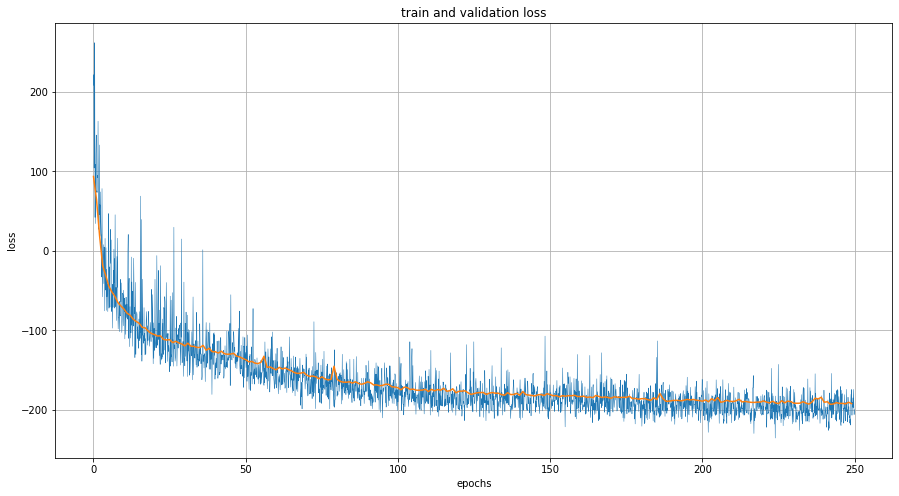

In [18]:
plt.figure(figsize=(15,8))
plt.title("train and validation loss")
epoch_axis = np.arange(len(svi.loss_history["train"]))
plt.plot(epoch_axis/10, np.array(svi.loss_history["train"]), lw=0.5) #np.arange(len(svi.loss_history["validation"]))*10
plt.plot(np.arange(len(svi.loss_history["validation"])), svi.loss_history["validation"])
plt.grid(True)
plt.xlabel("epochs") # 1 epoch = 10 points on x axis
plt.ylabel("loss")
plt.show()

In [23]:
#torch.save(svi.model, "VAE_saves_and_logs/DeepDenseVAE_mark_IV_[160-256-128-128-15]_VDO_GNLL_250ep_lr-1e-4.pt")
#torch.save(svi.optimizer, "VAE_saves_and_logs/DeepDenseVAE_mark_IV_[160-256-128-128-15]__VDO_GNLL_250ep_lr-1e-4_optimizer.pt")
#dd.save("VAE_saves_and_logs/DeepDenseVAE_mark_IV_[160-256-128-128-15]_VDO_GNLL_250ep_lr-1e-4_loss_history.h5", svi.loss_history)

# Evaluation

cuda:0


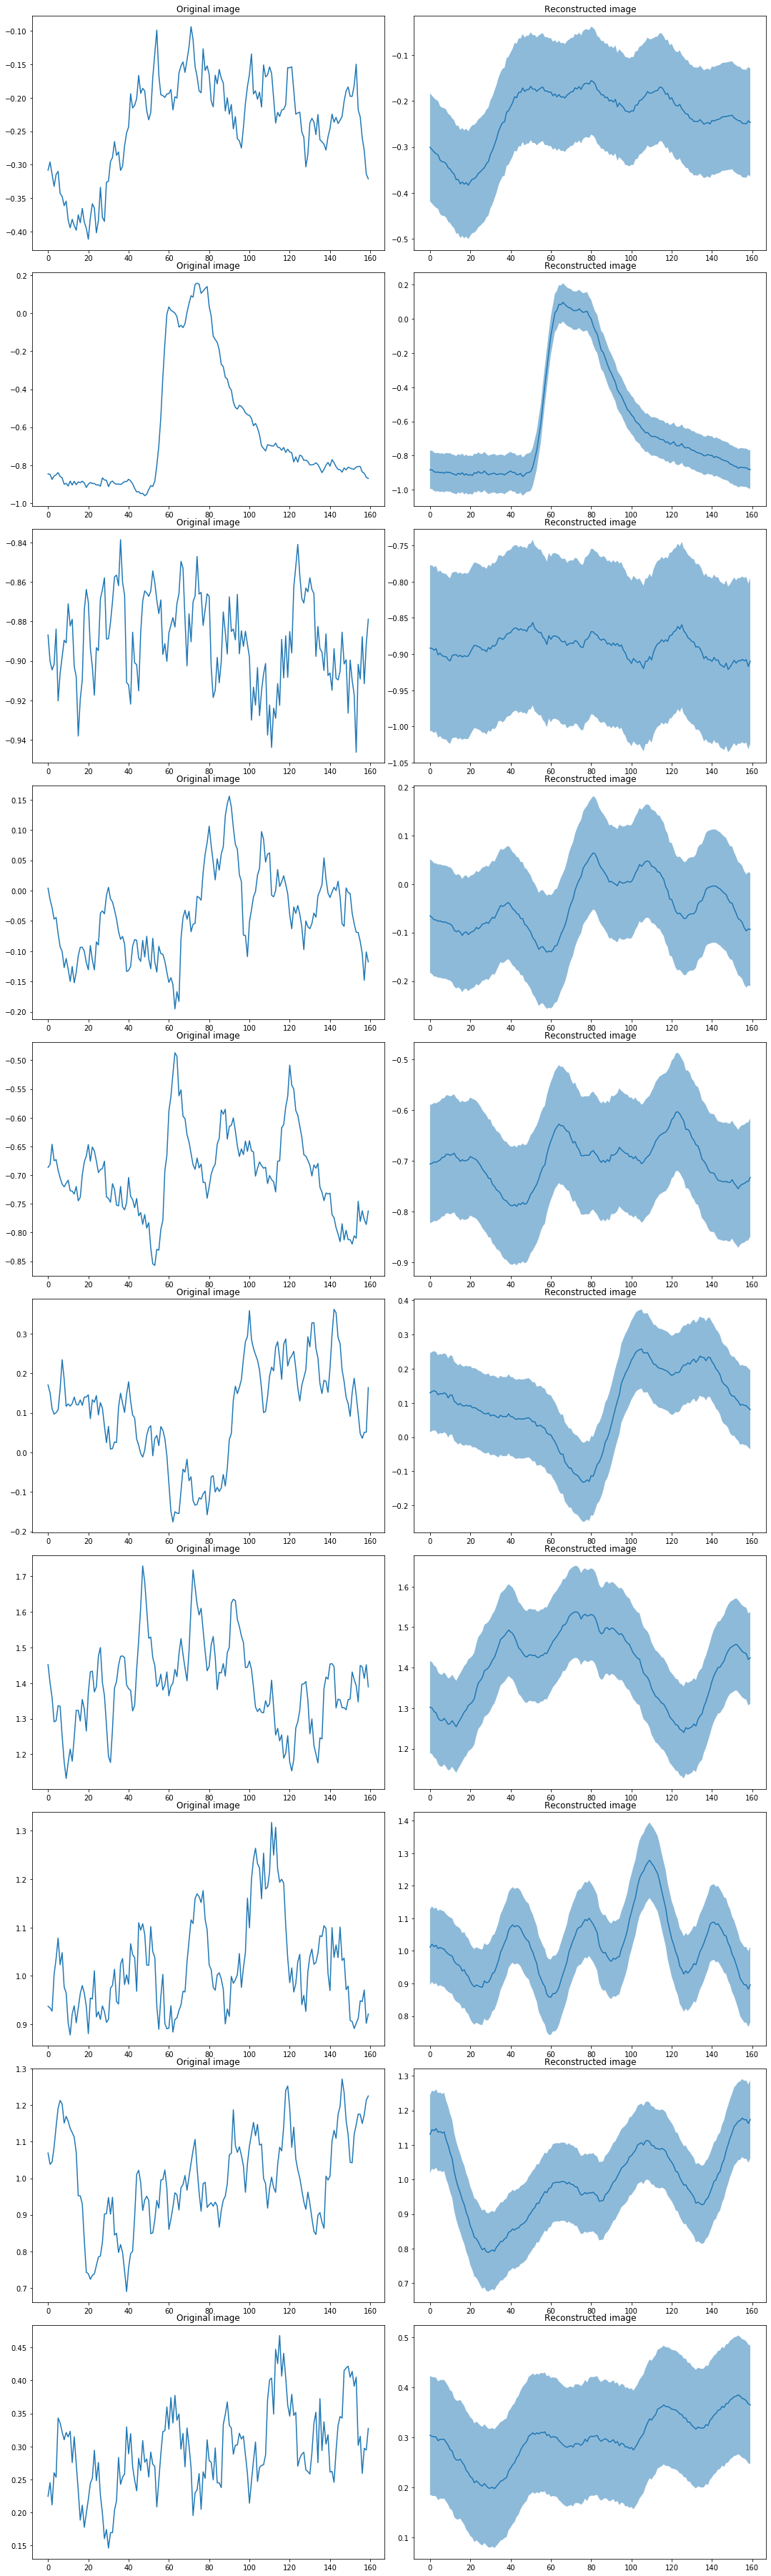

In [24]:
print(device)
X,_ = next(iter(test_loader))
output, mu, sigma = svi.model(X.to(device))
#X_hat = output.cpu().detach().numpy()
mu_hat = output[0].cpu().detach().numpy()
sigma = output[1].cpu().detach().numpy()

fig, axes = plt.subplots(10, 2, figsize=(15,50))
fig.tight_layout()
for i in range(10):
    axes[i][0].plot(X[i])
    axes[i][0].set_title('Original image')
    #axes[i][1].plot(X_hat[i])
    axes[i][1].plot(mu_hat[i])
    axes[i][1].fill_between(np.arange(160), mu_hat[i] + 2 * sigma[i], mu_hat[i] - 2 * sigma[i], alpha = 0.5, label="Uncertainty")
    axes[i][1].set_title('Reconstructed image')

# Load Model

In [26]:
mod = torch.load("VAE_saves_and_logs/DeepDenseVAE_mark_IV_[160-256-128-128-15]_VDO_GNLL_250ep_lr-1e-4.pt")

In [27]:
mod.eval()

DeepDenseVAE_mark_IV(
  (encoder): Sequential(
    (0): Flatten()
    (1): Linear(in_features=160, out_features=256, bias=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): LeakyReLU(negative_slope=0.01)
    (5): Linear(in_features=128, out_features=128, bias=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): VariationalLayer(
      (mu): Linear(in_features=128, out_features=15, bias=True)
      (rho): Linear(in_features=128, out_features=15, bias=True)
      (softplus): Softplus(beta=1, threshold=20)
    )
  )
  (decoder): Sequential(
    (0): Linear(in_features=15, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=128, out_features=256, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): VariationalDecoderOutput(
      (mu): Linear(in_features=256, out_features

In [28]:
z, mu, sigma = mod.encoder(X.to(device))

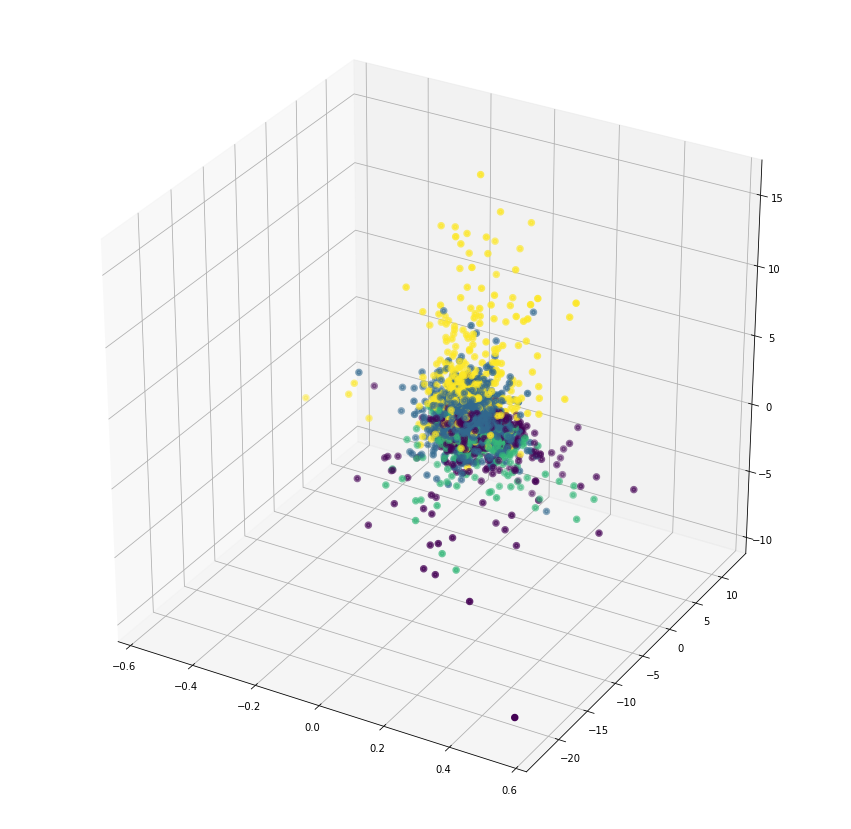

In [29]:
X_1, cl = test.X, test.y
Z_hat, mu, sigma = mod.encoder(X_1.to(device)) #.view(-1,28*28)
Z_hat = Z_hat.cpu().detach().numpy()
mu = mu.cpu().detach().numpy()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(Z_hat[:,0], Z_hat[:,1], Z_hat[:,2], c=cl, lw=3)
sc = ax.scatter(mu[:,0], mu[:,1], mu[:,2], c=cl, lw=3)

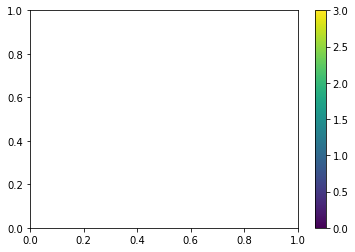

In [26]:
# když přidám colorbar k obrázku tak se nehezky deformuje, tak je tady zvlášť
plt.colorbar(sc, shrink=1)

In [45]:
test.y

tensor([1., 1., 1.,  ..., 3., 1., 0.])